<a href="https://colab.research.google.com/github/GhassenSmaoui/iris/blob/master/Iris_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

TensorFlow 2.x selected.


In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import preprocessing # the preprocessing module is used in the below cell to scale the data (normalize it )
iris = load_iris()
iris['target'].shape
iris.data.shape

(150, 4)

In [0]:
X_train, X_test , Y_train , Y_test = train_test_split(preprocessing.scale(iris['data']), iris['target'], random_state = 0)

The below cell introduces a function that transforms the target to categorical type of data that is used for multiclass classification

In [0]:

Y = tf.keras.utils.to_categorical(iris['target'])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 8, input_shape = [4], activation = tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(8, input_shape = [8], activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(3, input_shape = [8], activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy'
             )

In [0]:
print(Y_train)

[1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


In [0]:
Y_train.shape

(112,)

In [0]:
Y_target = np.zeros((112,3), dtype=int)
for i in range(Y_target.shape[0]):
  Y_target[i,Y_train[i]] = 1

In [0]:
#model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))
history = model.fit(X_train, Y_target, epochs=1000,  verbose=False)
print("Finished training the model")

Finished training the model


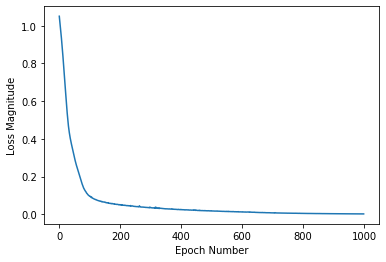

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])


In [0]:
 train_prediction = model.predict(X_train)
 train_prediction_integer = np.zeros(train_prediction.shape, dtype=int)

In [0]:
for i in range(train_prediction.shape[0]):
  train_prediction_integer[i,np.argmax(train_prediction[i])] = 1

In [0]:
train_prediction_integer[0:10]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [0]:
Y_target[0:10]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [0]:
inc = 0
for i in range(Y_target.shape[0]):
  if np.array_equal(Y_target[i], train_prediction_integer[i]):
    inc +=1
performance_value = (inc /Y_target.shape[0])*100
print (performance_value) 

100.0


In [0]:
Y_test[0:5]

array([2, 1, 0, 2, 0])

In [0]:
Y_test_classes = np.zeros((Y_test.size,3), dtype=int)
for i in range(Y_test.size):
  Y_test_classes[i,Y_test[i]] = 1

In [0]:
 test_prediction = model.predict(X_test)
 test_prediction_integer = np.zeros(test_prediction.shape, dtype=int)

In [0]:
for i in range(test_prediction.shape[0]):
  test_prediction_integer[i,np.argmax(test_prediction[i])] = 1

In [0]:
inc = 0
for i in range(Y_test_classes.shape[0]):
  if np.array_equal(Y_test_classes[i], test_prediction_integer[i]):
    inc +=1
test_performance_value = (inc /Y_test_classes.shape[0])*100
print (test_performance_value) 

97.36842105263158
